## Import Packages

In [2]:
import sys
from json import dumps

sys.path.append('../')

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from datasets import load_data
from src.gaussian_mixture import GMMModelSelection
from src.merge_components import NMCMergeComponents

# Flea beetles Dataset

## Load data

In [5]:
X, _ = load_data(data_name='beetles', scaling=True)

## Fit GMM to obtain unmerged probabilities (prob_0)

In [6]:
gmm = GMMModelSelection(K_max=20, mode='BGMM', weight_concentration_prior=0.1, random_state=2)
gmm.fit(X)
prob_0 = gmm.prob_latent(X)

## Fit merging algorithm to obtain clustering summarization

In [7]:
algorithm = NMCMergeComponents()
algorithm.fit(prob_0)
summary = algorithm.clustering_summarization(prob_0, algorithm.K_nmc_)

## Summary

In [8]:
print(dumps(summary, indent=2))

{
  "Upper-components": {
    "MC": 0.9629300775202763,
    "NMC": 0.8967659716919967
  },
  "Component 0": {
    "Weight": 0.43933391402699595,
    "MC": 0.056913500941558476,
    "exp(MC)": 1.0585642416250505,
    "NMC": 0.20825617734006183
  },
  "Component 1": {
    "Weight": 0.26724160206182795,
    "MC": -2.220446049250313e-16,
    "exp(MC)": 0.9999999999999998,
    "NMC": 0.0
  },
  "Component 2": {
    "Weight": 0.2934244839111761,
    "MC": 1.1102230246251564e-16,
    "exp(MC)": 1.0,
    "NMC": 0.0
  }
}


## Predicted labels

In [16]:
Z_pred = np.argmax(algorithm.prob_merged(prob_0, algorithm.K_nmc_), axis=1)

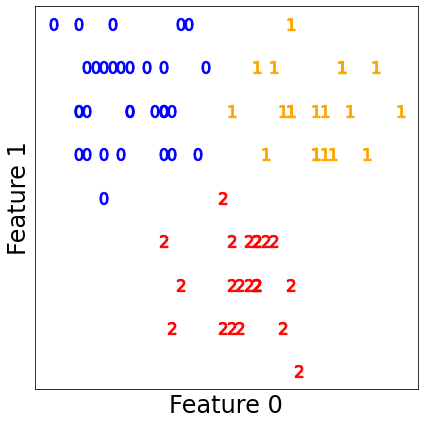

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
color_list = ['blue', 'orange', 'red']
for k in range(3):
    X_k = X[Z_pred == k]
    ax.scatter(X_k[:, 0], X_k[:, 1], s=150, color=color_list[k], marker='${}$'.format(k), zorder=-k)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Feature 0', fontsize=24)
ax.set_ylabel('Feature 1', fontsize=24)

plt.tight_layout()

# Wisconsin Breast Cancer Dataset

## Load data

In [19]:
X, _ = load_data(data_name='wisconsin', scaling=True)

## Fit GMM to obtain unmerged probabilities (prob_0)

In [20]:
gmm = GMMModelSelection(K_max=20, mode='BGMM', weight_concentration_prior=0.1, random_state=1)
gmm.fit(X)
prob_0 = gmm.prob_latent(X)

## Fit merging algorithm to obtain clustering summarization

In [21]:
algorithm = NMCMergeComponents()
algorithm.fit(prob_0)
summary = algorithm.clustering_summarization(prob_0, algorithm.K_nmc_)

## Summary

In [22]:
print(dumps(summary, indent=2))

{
  "Upper-components": {
    "MC": 0.5088602110964211,
    "NMC": 0.7625818399571737
  },
  "Component 0": {
    "Weight": 0.3867802282194372,
    "MC": 0.7139378309507982,
    "exp(MC)": 2.042016563154572,
    "NMC": 0.6125554793306818
  },
  "Component 1": {
    "Weight": 0.6132197717805629,
    "MC": 0.27013763353673154,
    "exp(MC)": 1.3101447581814856,
    "NMC": 0.6759865308558058
  }
}


## Predicted labels

In [23]:
Z_pred = np.argmax(algorithm.prob_merged(prob_0, algorithm.K_nmc_), axis=1)

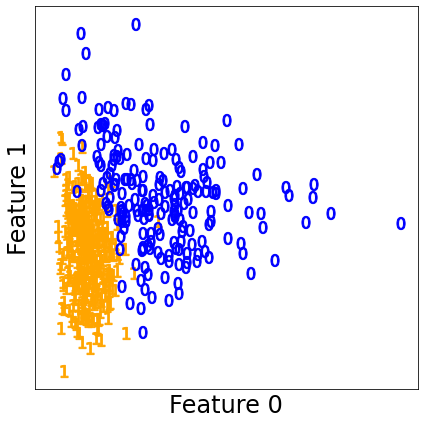

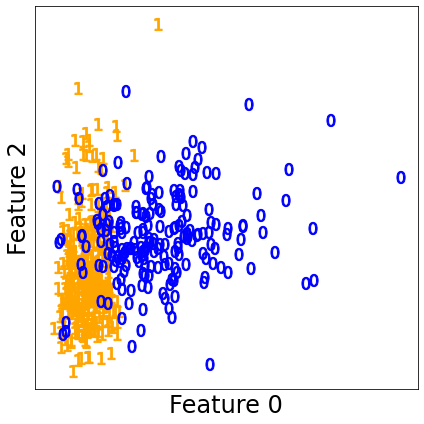

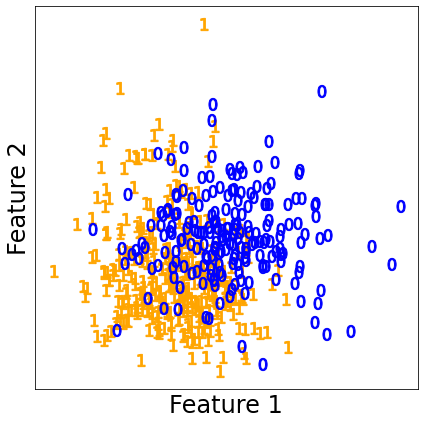

In [25]:
for (x, y) in [(0, 1), (0, 2), (1, 2)]:

    fig, ax = plt.subplots(figsize=(6, 6))
    color_list = ['blue', 'orange']
    for k in range(2):
        X_k = X[Z_pred == k]
        ax.scatter(X_k[:, x], X_k[:, y], s=150, color=color_list[k], marker='${}$'.format(k), zorder=-k)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(f'Feature {x}', fontsize=24)
    ax.set_ylabel(f'Feature {y}', fontsize=24)

    plt.tight_layout()